## Observations and Insights 

In [2]:
# Dependencies and Setup

%config IPCompleter.greedy=True

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# data files to load and read
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# mouse_metadata = mouse_metadata.merge(study_results, on = "Mouse ID", how="inner")
combined_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

In [3]:
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice in the DataFrame.

totNumOfmice = combined_df["Mouse ID"].nunique()
timepoint_count=combined_df["Timepoint"].nunique()
mice_count=combined_df["Mouse ID"].value_counts()

print("Total number of mice: " + str(totNumOfmice))
print("----------------------")
print("Number of timepoint: " + str(timepoint_count))
print("----------------------")
print("Count of mice : ")
print(mice_count) 
combined_df.loc[combined_df["Mouse ID"]=="g989"] # <--duplicates sample

Total number of mice: 249
----------------------
Number of timepoint: 10
----------------------
Count of mice : 
g989    13
v991    10
w422    10
m601    10
e213    10
        ..
x226     1
x336     1
h428     1
o848     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
dup=combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"],keep ='first')]
dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID using "drop_duplicates" function.
combined_clean_df=combined_df.drop_duplicates(["Mouse ID", "Timepoint"],keep ='first')

In [14]:
# Checking the number of mice in the clean DataFrame.
combined_clean_df["Mouse ID"].value_counts()

v991    10
i557    10
m601    10
e213    10
y478    10
        ..
x226     1
x336     1
h428     1
o848     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [21]:
# playground @@@@@@@@@@@@@@@@@@@@@@@@
a= combined_clean_df["Sex"].value_counts()
b= combined_clean_df["Sex"].count()
c= combined_clean_df.count()

#plt.plot(combined_clean_df.Timepoint, combined_clean_df["Tumor Volume (mm3)"])
#plt.title('Test')
#plt.show()
print(c)
print('---------')
print(a)

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64
---------
Male      958
Female    930
Name: Sex, dtype: int64


## Summary Statistics

In [10]:
# summary stat for Tumor Volume of the entire regimen
mean_all = combined_clean_df["Tumor Volume (mm3)"].mean()
median_all = combined_clean_df["Tumor Volume (mm3)"].median()
var_all = combined_clean_df["Tumor Volume (mm3)"].var()
std_all = combined_clean_df["Tumor Volume (mm3)"].std()
sem_all = combined_clean_df["Tumor Volume (mm3)"].sem()

Summary_allStat_df=pd.DataFrame({"Mean":[mean_all],"Median":median_all, "Variance":var_all, 
                              "Standard Deviation":std_all,"SEM":sem_all})
Summary_allStat_df.head(10).style.format({"Mean":"{:.2f}","Median":"{:.2f}", "Variance":"{:.2f}", 
                              "Standard Deviation":"{:.2f}","SEM":"{:.2f}"})

,Mean,Median,Variance,Standard Deviation,SEM
0,50.45,48.95,79.29,8.90,0.20


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

byDrug = combined_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

mean_drug= byDrug.mean()
median_drug= byDrug.median()
var_drug= byDrug.var()
std_drug= byDrug.std()
sem_drug= byDrug.sem()

Summary_stat_df=pd.DataFrame({"Mean":mean_drug,"Median":median_drug, "Variance":var_drug, 
                              "Standard Deviation":std_drug,"SEM":sem_drug})
Summary_stat_df.head(10).style.format({"Mean":"{:.2f}","Median":"{:.2f}", "Variance":"{:.2f}", 
                              "Standard Deviation":"{:.2f}","SEM":"{:.2f}"})


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


([<matplotlib.axis.XTick at 0x2cbb01cef08>,
 <a list of 5 Text xticklabel objects>)

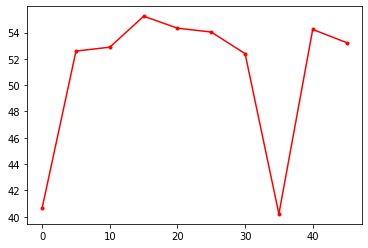

In [24]:
# play around @@@@@@

x_axis= combined_clean_df["Timepoint"].unique()
plt.plot(x_axis, mean_drug, 'r.-')
plt.xticks(x_axis[::2])

## Bar Plots

In [25]:
#Condition for each treatment
Capomulin_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Capomulin"]
Ceftamin_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Ceftamin"]
Infubinol_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Infubinol"]
Ketapril_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Ketapril"]
Naftisol_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Naftisol"]
Placebo_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Placebo"]
Propriva_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Propriva"]
Ramicane_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Ramicane"]
Stelasyn_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Stelasyn"]
Zoniferol_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Zoniferol"]

Bar using Pandas

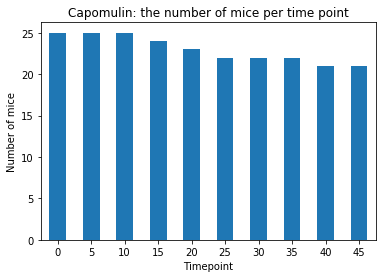

In [28]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#groupby "Timepoint"   --> x-axis
Capomulin_grp = Capomulin_df.groupby("Timepoint")
#number of mice per timepoint  --> y value
nMice_Capomulin = Capomulin_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax1 = nMice_Capomulin.plot(kind="bar", rot=0)
plt.title("Capomulin: the number of mice per time point")
plt.ylabel("Number of mice")
ax1 

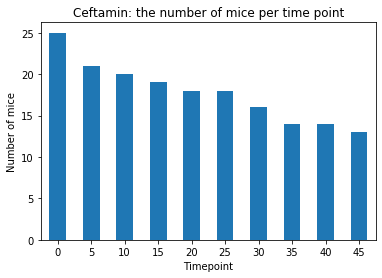

In [22]:
# repeat the first for each drug

Ceftamin_grp = Ceftamin_df.groupby("Timepoint")
nMice_Ceftamin = Ceftamin_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax2 = nMice_Ceftamin.plot(kind="bar", rot=0)
plt.title("Ceftamin: the number of mice per time point")
plt.ylabel("Number of mice")
ax2 

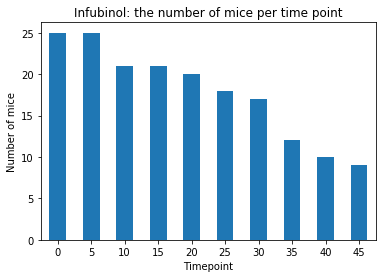

In [23]:
Infubinol_grp = Infubinol_df.groupby("Timepoint")
nMice_Infubinol = Infubinol_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax3 = nMice_Infubinol.plot.bar(rot=0)
plt.title("Infubinol: the number of mice per time point")
plt.ylabel("Number of mice")
ax3 

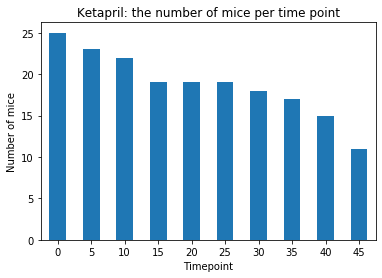

In [24]:
Ketapril_grp = Ketapril_df.groupby("Timepoint")
nMice_Ketapril = Ketapril_grp["Mouse ID"].count()  

ax4 = nMice_Ketapril.plot.bar(rot=0)
plt.title("Ketapril: the number of mice per time point")
plt.ylabel("Number of mice")
ax4 

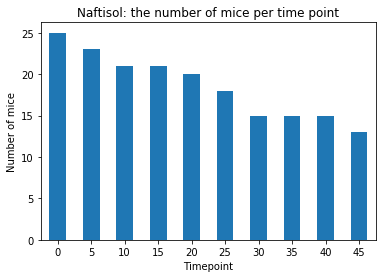

In [25]:
Naftisol_grp = Naftisol_df.groupby("Timepoint")
nMice_Naftisol = Naftisol_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax5 = nMice_Naftisol.plot.bar(rot=0)
plt.title("Naftisol: the number of mice per time point")
plt.ylabel("Number of mice")
ax5 

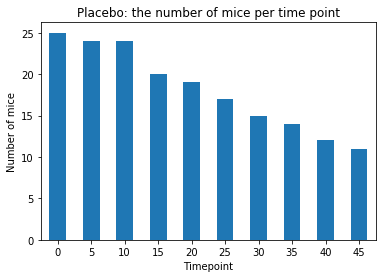

In [26]:
Placebo_grp = Placebo_df.groupby("Timepoint")
nMice_Placebo = Placebo_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax6 = nMice_Placebo.plot.bar(rot=0)
plt.title("Placebo: the number of mice per time point")
plt.ylabel("Number of mice")
ax6 

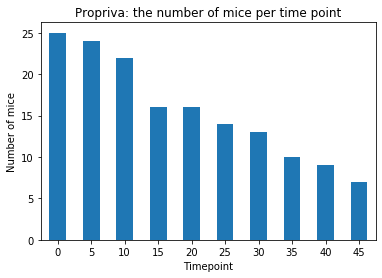

In [27]:
Propriva_grp = Propriva_df.groupby("Timepoint")
nMice_Propriva = Propriva_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax7 = nMice_Propriva.plot.bar(rot=0)
plt.title("Propriva: the number of mice per time point")
plt.ylabel("Number of mice")
ax7 

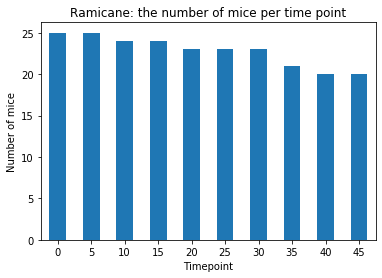

In [28]:
Ramicane_grp = Ramicane_df.groupby("Timepoint")
nMice_Ramicane = Ramicane_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax8 = nMice_Ramicane.plot.bar(rot=0)
plt.title("Ramicane: the number of mice per time point")
plt.ylabel("Number of mice")
ax8 

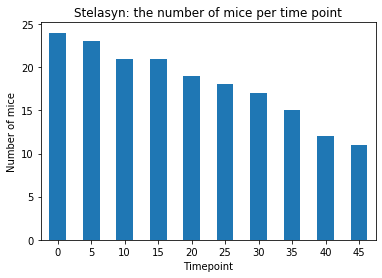

In [29]:
Stelasyn_grp = Stelasyn_df.groupby("Timepoint")
nMice_Stelasyn = Stelasyn_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax9 = nMice_Stelasyn.plot.bar(rot=0)
plt.title("Stelasyn: the number of mice per time point")
plt.ylabel("Number of mice")
ax9 

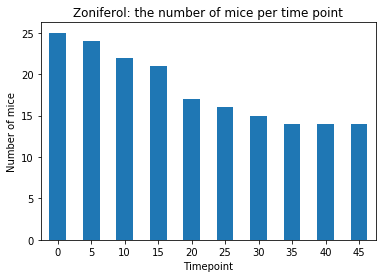

In [30]:
Zoniferol_grp = Zoniferol_df.groupby("Timepoint")
nMice_Zoniferol = Zoniferol_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax10 = nMice_Zoniferol.plot(kind="bar", rot=0)
plt.title("Zoniferol: the number of mice per time point")
plt.ylabel("Number of mice")
ax10 

Bar using pyplot

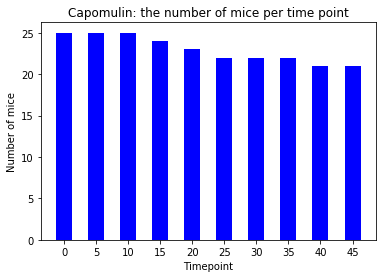

<Figure size 432x288 with 0 Axes>

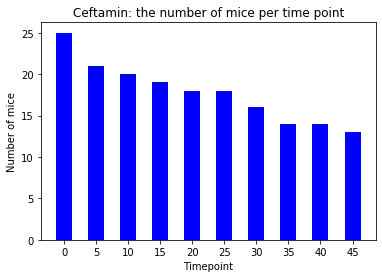

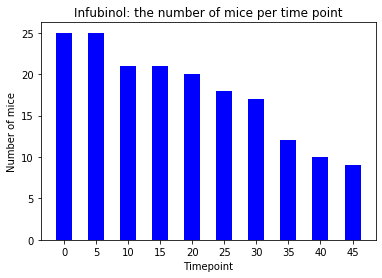

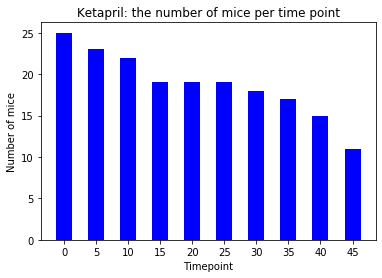

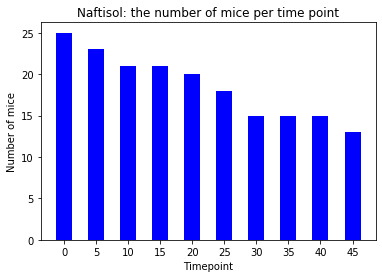

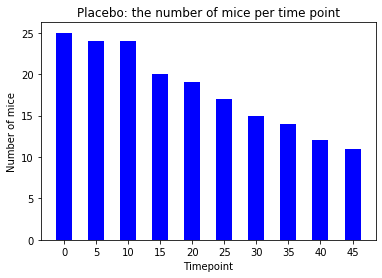

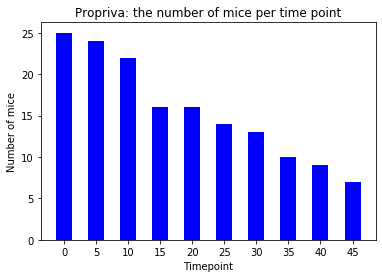

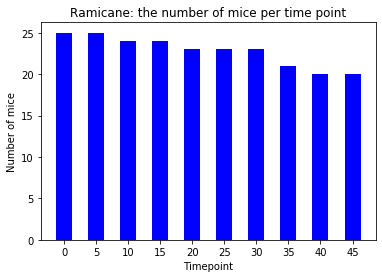

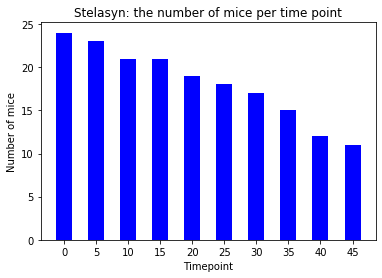

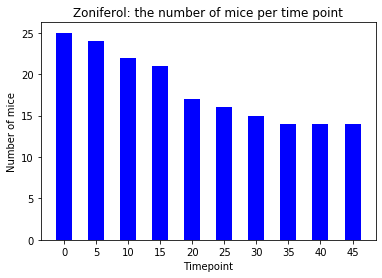

In [38]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#define x-axis : unique value from "Timepoint" column. All drugs share this x-axis.
x_axis= Capomulin_df["Timepoint"].unique()

#ploting bar chart
plt.bar(x_axis, nMice_Capomulin, width=2.5,color='blue')
plt.title("Capomulin: the number of mice per time point")
#x-axis label
plt.xlabel("Timepoint")
#y-axis label
plt.ylabel("Number of mice")
#x-axis ticks
plt.xticks(x_axis)
#chart size
plt.figure(figsize=(6,4))

plt.figure(figsize=(6,4))
plt.bar(x_axis, nMice_Ceftamin, width=2.5,color='blue')
plt.title("Ceftamin: the number of mice per time point")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)

plt.figure(figsize=(6,4))
plt.bar(x_axis, nMice_Infubinol, width=2.5,color='blue')
plt.title("Infubinol: the number of mice per time point")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)

plt.figure(figsize=(6,4))
plt.bar(x_axis, nMice_Ketapril, width=2.5,color='blue')
plt.title("Ketapril: the number of mice per time point")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)

plt.figure(figsize=(6,4))
plt.bar(x_axis, nMice_Naftisol, width=2.5,color='blue')
plt.title("Naftisol: the number of mice per time point")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)

plt.figure(figsize=(6,4))
plt.bar(x_axis, nMice_Placebo, width=2.5,color='blue')
plt.title("Placebo: the number of mice per time point")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)

plt.figure(figsize=(6,4))
plt.bar(x_axis, nMice_Propriva, width=2.5,color='blue')
plt.title("Propriva: the number of mice per time point")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)

plt.figure(figsize=(6,4))
plt.bar(x_axis, nMice_Ramicane, width=2.5,color='blue')
plt.title("Ramicane: the number of mice per time point")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)

plt.figure(figsize=(6,4))
plt.bar(x_axis, nMice_Stelasyn, width=2.5,color='blue')
plt.title("Stelasyn: the number of mice per time point")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)

plt.figure(figsize=(6,4))
plt.bar(x_axis, nMice_Zoniferol, width=2.5,color='blue')
plt.title("Zoniferol: the number of mice per time point")
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)

plt.show()


## Pie Plots

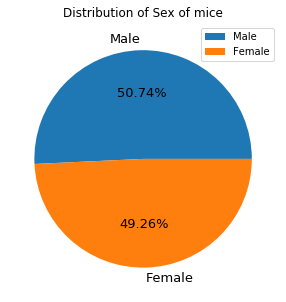

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# count of mice by sex
countOfmice_sex = combined_clean_df['Sex'].value_counts()
ax = countOfmice_sex.plot(kind='pie', autopct='%.2f%%',title="Distribution of Sex of mice",label = "",fontsize = 13, legend = True,figsize =(5,5))

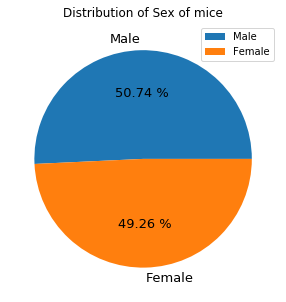

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
countOfmice_sex = combined_clean_df['Sex'].value_counts()

#labels
plt.figure(figsize=(5,5))
labels = combined_clean_df['Sex'].unique()
plt.pie(countOfmice_sex, labels=labels, autopct='%.2f %%', textprops={'fontsize': 13})
#plt.axis("equal")
plt.title("Distribution of Sex of mice")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Capomulin"]

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
